<a href="https://colab.research.google.com/github/Amakudegloria/Divvy-Bike-Share-Analysis-R-Lang/blob/master/Divvy_Bike_Share_Analysis_R_Lang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

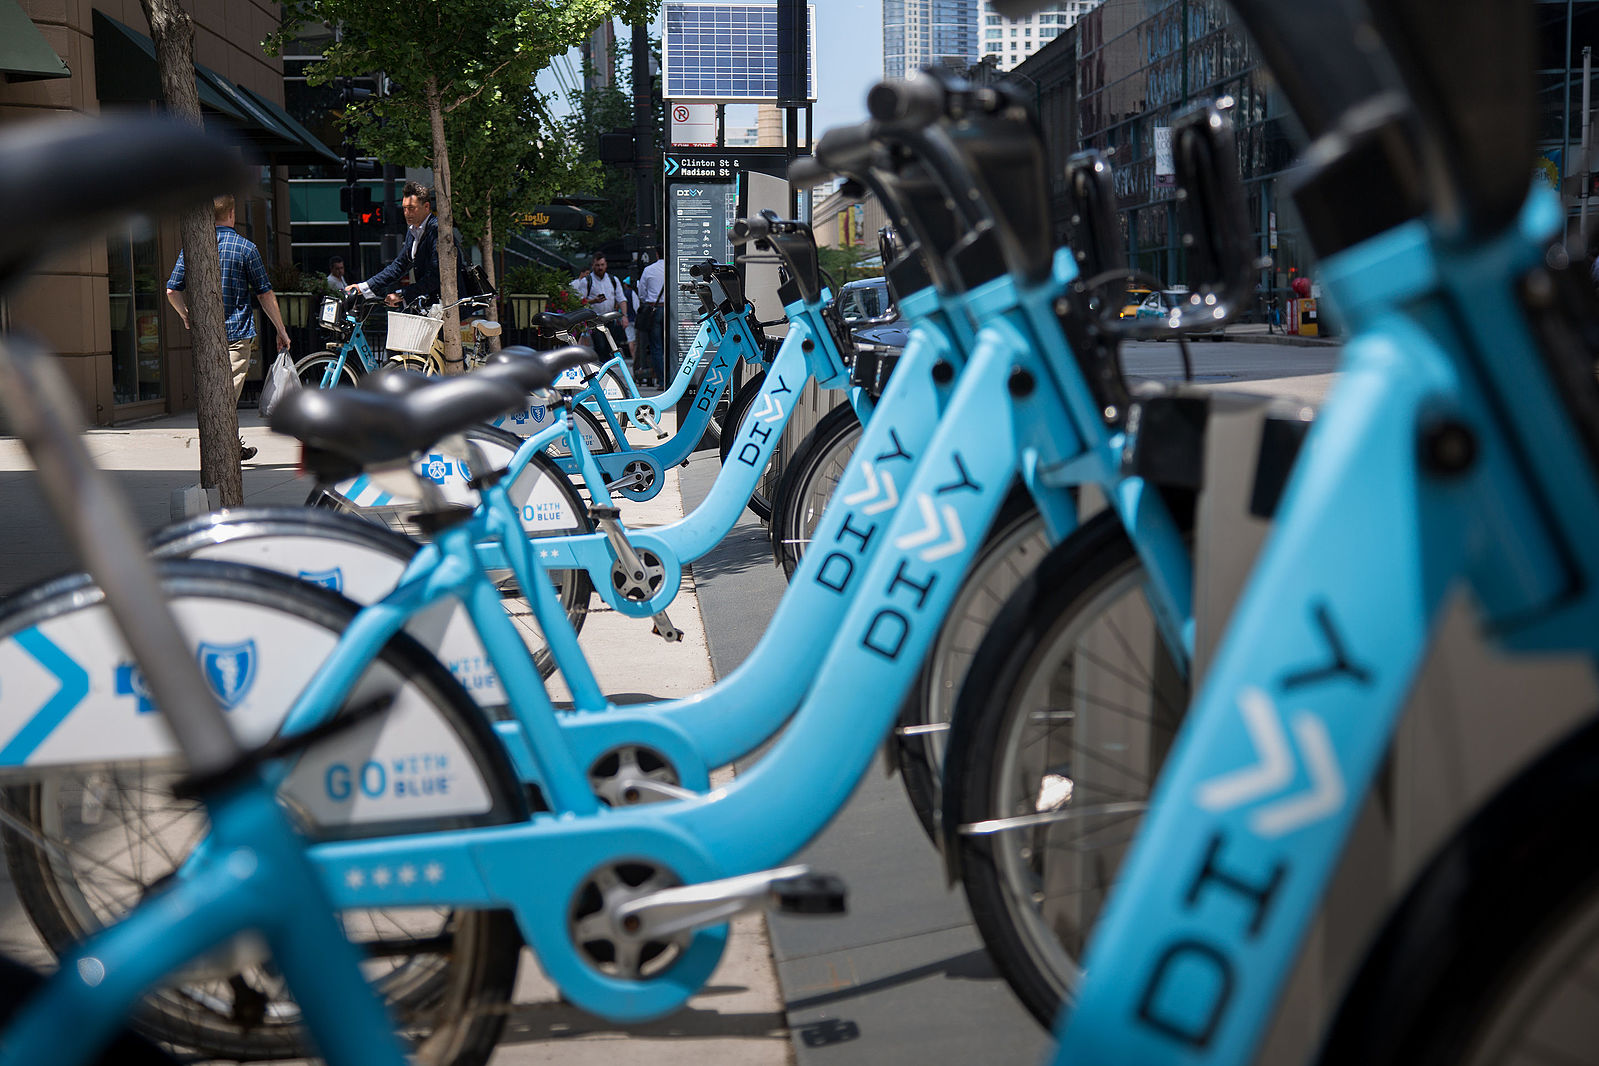

#**Divvy Bike Share**
Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. With the latest technologies, it is easy for a user to access a dock within the system and unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, I will perform an exploratory analysis on data provided by Divvy, a bike-share system provider for many major cities in the United States. I will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. I will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

Let us start by asking questions we might want to understand about the bike share data. Such as; What kinds of information would we want to know in order to make smarter business decisions?

1. which month has the most bike usage?
2. On which particularly day/week of the month do our users use the bike most?
3. which day of the week do the users use the bike most?
4. On which hour of day do we have the most users ?
5. What is our most common start station?
6. What is the most frequent trip (i.e., most frequent combination of start station and end station)?
7. What is the overall travel time so far?
8. What is the Average travel time so far?
9. What are the various User Types and their Trip Durations.
10. gender and age distribution of Users.

# **Import Packages**

In [ ]:
library("plyr")
library("ggplot2")
library(lubridate)
installed.packages('ggplot2')

# **Data Wrangling**


In [ ]:
#Now lets have a look at the dataset
NYC_df = read.csv('new_york_city.csv')
Washington_df = read.csv('washington.csv')
Chicago_df = read.csv('chicago.csv')

#concatenate all three datasets so as to make analysis on our overall data
Bike_share_df <- rbind.fill(ny,chi,wash)


In [ ]:
head(ny)

X       Start.Time          End.Time            Trip.Duration
1 5688089 2017-06-11 14:55:05 2017-06-11 15:08:21  795         
2 4096714 2017-05-11 15:30:11 2017-05-11 15:41:43  692         
3 2173887 2017-03-29 13:26:26 2017-03-29 13:48:31 1325         
4 3945638 2017-05-08 19:47:18 2017-05-08 19:59:01  703         
5 6208972 2017-06-21 07:49:16 2017-06-21 07:54:46  329         
6 1285652 2017-02-22 18:55:24 2017-02-22 19:12:03  998         
  Start.Station           End.Station            User.Type  Gender Birth.Year
1 Suffolk St & Stanton St W Broadway & Spring St Subscriber Male   1998      
2 Lexington Ave & E 63 St 1 Ave & E 78 St        Subscriber Male   1981      
3 1 Pl & Clinton St       Henry St & Degraw St   Subscriber Male   1987      
4 Barrow St & Hudson St   W 20 St & 8 Ave        Subscriber Female 1986      
5 1 Ave & E 44 St         E 53 St & 3 Ave        Subscriber Male   1992      
6 State St & Smith St     Bond St & Fulton St    Subscriber Male   1986

In [ ]:
head(wash)

X       Start.Time          End.Time            Trip.Duration
1 1621326 2017-06-21 08:36:34 2017-06-21 08:44:43  489.066     
2  482740 2017-03-11 10:40:00 2017-03-11 10:46:00  402.549     
3 1330037 2017-05-30 01:02:59 2017-05-30 01:13:37  637.251     
4  665458 2017-04-02 07:48:35 2017-04-02 08:19:03 1827.341     
5 1481135 2017-06-10 08:36:28 2017-06-10 09:02:17 1549.427     
6 1148202 2017-05-14 07:18:18 2017-05-14 07:24:56  398.000     
  Start.Station                              
1 14th & Belmont St NW                       
2 Yuma St & Tenley Circle NW                 
3 17th St & Massachusetts Ave NW             
4 Constitution Ave & 2nd St NW/DOL           
5 Henry Bacon Dr & Lincoln Memorial Circle NW
6 1st & K St SE                              
  End.Station                                         User.Type 
1 15th & K St NW                                      Subscriber
2 Connecticut Ave & Yuma St NW                        Subscriber
3 5th & K St NW                                       Subscriber
4 M St & Pennsylvania Ave NW                          Customer  
5 Maine Ave & 7th St SW                               Subscriber
6 Eastern Market Metro / Pennsylvania Ave & 7th St SE Subscriber

In [ ]:
head(chi)

X       Start.Time          End.Time            Trip.Duration
1 1423854 2017-06-23 15:09:32 2017-06-23 15:14:53  321         
2  955915 2017-05-25 18:19:03 2017-05-25 18:45:53 1610         
3    9031 2017-01-04 08:27:49 2017-01-04 08:34:45  416         
4  304487 2017-03-06 13:49:38 2017-03-06 13:55:28  350         
5   45207 2017-01-17 14:53:07 2017-01-17 15:02:01  534         
6 1473887 2017-06-26 09:01:20 2017-06-26 09:11:06  586         
  Start.Station                 End.Station                  User.Type  Gender
1 Wood St & Hubbard St          Damen Ave & Chicago Ave      Subscriber Male  
2 Theater on the Lake           Sheffield Ave & Waveland Ave Subscriber Female
3 May St & Taylor St            Wood St & Taylor St          Subscriber Male  
4 Christiana Ave & Lawrence Ave St. Louis Ave & Balmoral Ave Subscriber Male  
5 Clark St & Randolph St        Desplaines St & Jackson Blvd Subscriber Male  
6 Clinton St & Washington Blvd  Canal St & Taylor St         Subscriber Male  
  Birth.Year
1 1992      
2 1992      
3 1981      
4 1986      
5 1975      
6 1990

### Concate new york and chicago datasets

In [ ]:
NY_Chicago_df <- rbind.fill(ny,chi)

## create a mode function

In [ ]:
Mode <- function(x, na.rm = TRUE) {
  if(na.rm){
    x = x[!is.na(x)]
  }

  ux <- unique(x)
  return(ux[which.max(tabulate(match(x, ux)))])
}

# **Data Exploration and Analysis**
Now it's time to collect and explore our data!!!

## **Question 1**
In which month do we have the most usage of our bikes?

**Answer**: The most common month is **June**

In [ ]:
#This will add a new column (Month) to the dataframe with the specified format.

Bike_share_df$Month <- format(as.Date(Bike_share_df$Start.Time), "%m")

#calculate the mode of the months

month_mode <- Bike_share_df$Month
month_mode <- Mode(month_mode)
paste("The most common month in all three cities is: ", month_mode)

[1] "The most common month in Chicago city is:  06"

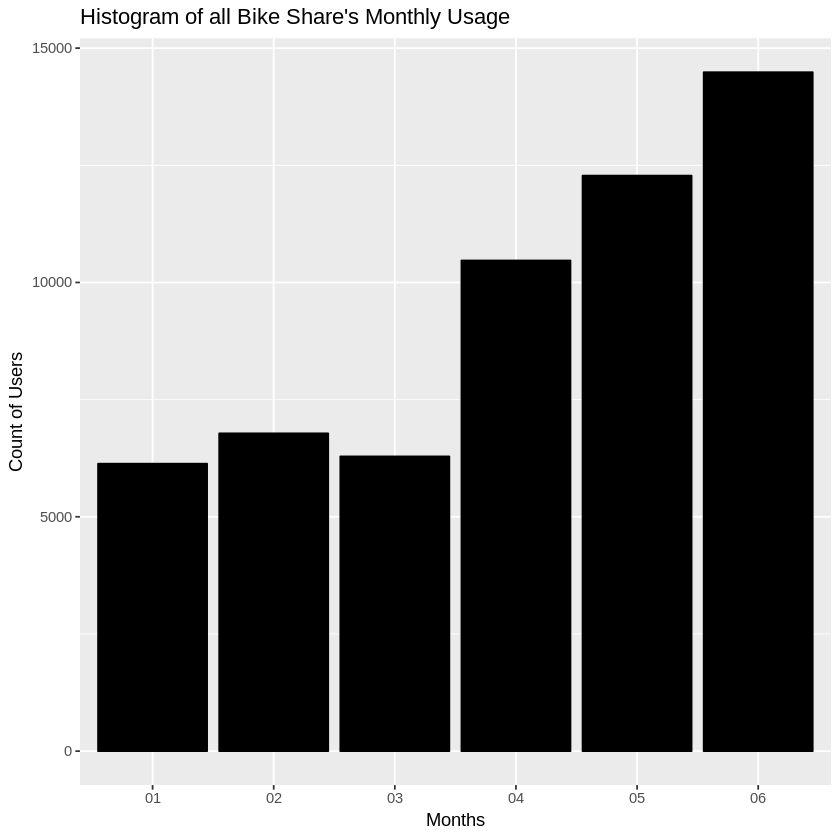

In [ ]:
qplot(x=Month,data= na.omit(Bike_share_df), color=I('Black'),fill=I('Black'))+
ggtitle("Histogram of all Bike Share's Monthly Usage") +
labs(x = "Months")+
labs(y = "Count of Users")

##**Question 3**
which days of the week do our users use the bike most?

**Answer**: The most common weekday is **Wednesday**

In [ ]:
#This will add a new column (Weekday) to the dataframe with the specified format.

Bike_share_df$Weekday <- format(as.Date(Bike_share_df$Start.Time), "%A")

#calculate the mode of the weekdays
BS_wk_mode <- Bike_share_df$Weekday
BS_wk_mode <- Mode(BS_wk_mode)
paste("The most common weekday in all three cities is: ", BS_wk_mode)

[1] "The most common weekday in Chicago city is:  Monday"

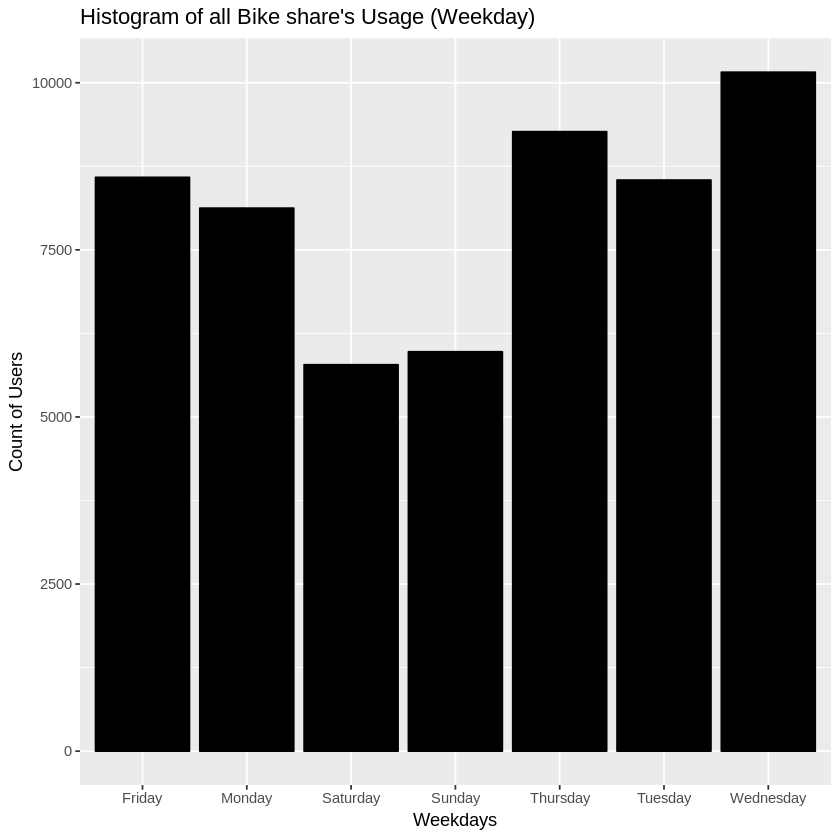

In [ ]:
qplot(x=Weekday,data=na.omit(Bike_share_df), color=I('Black'),fill=I('Blue'))+
ggtitle("Histogram of all Bike share's Usage (Weekday)") +
labs(x = "Weekdays")+
labs(y = "Count of Users")


##**Question 4**
On which hour of the day do we have the most users ?

**Answer**: The most common hour of the day is **8am**

In [ ]:
#This will add a new column (Hour) to the dataframe with the specified format.

Bike_share_df$Hour <- format(as.POSIXct(strptime(Bike_share_df$Start.Time,"%Y-%m-%d %H:%M:%S",tz="")),format="%H")

#calculate the mode of the weekdays
BS_Hour_mode <- Bike_share_df$Hour
BS_Hour_mode <- Mode(BS_Hour_mode)
paste("The most common Hour in all three cities is: ", BS_Hour_mode)

[1] "The most common Hour in Chicago city is:  17"

qplot(x=Bike_share_df$Hour, data= Bike_share_df, color=I('Black'),fill=I('Black'))+
ggtitle("Histogram of all Bike share's Usage (Hour)") +
labs(x = "Hours")+
labs(y = "Count of Users")



**Summary of your question 1 results goes here.**

##**Question 5**
What is our most common start station?

**Answer**: The most common start station is **Streeter Dr & Grand Ave**

In [ ]:
#most common start station in chicago city

chi.str.stat.mode <- chi$Start.Station
chi.str.stat.mode <- Mode(chi.str.stat.mode)

paste("The most common start station in Chicago is: ", chi.str.stat.mode)

In [ ]:
#most common start station in new york city

ny.str.stat.mode <- ny$Start.Station
ny.str.stat.mode <- Mode(ny.str.stat.mode)

paste("The most common start station in New york city is: ", ny.str.stat.mode)

In [ ]:
#most common start station in washington city

wash.str.stat.mode <- wash$Start.Station
wash.str.stat.mode <- Mode(wash.str.stat.mode)

paste("The most common start station in Washington is: ", wash.str.stat.mode)

In [ ]:
#most common start station for all three cities

BS.str.stat.mode <- Bike_share_df$Start.Station
BS.str.stat.mode <- Mode(BS.str.stat.mode)

paste("The most common start station in all three cities is: ", BS.str.stat.mode)

##**Question 6**
What is our most common end station?

**Answer**: The most common end station is **Streeter Dr & Grand Ave**

In [ ]:
#most common end station in chicago city

chi.end.stat.mode <- chi$End.Station
chi.end.stat.mode <- Mode(chi.end.stat.mode)

paste("The most common end station in Chicago is: ", chi.end.stat.mode)

In [ ]:
#most common end station in new york city

ny.end.stat.mode <- ny$End.Station
ny.end.stat.mode <- Mode(ny.end.stat.mode)

paste("The most common end station in New York city is: ", ny.end.stat.mode)

In [ ]:
#most common end station in washington city

wash.end.stat.mode <- wash$End.Station
wash.end.stat.mode <- Mode(wash.end.stat.mode)

paste("The most common end station in Washington city is: ", wash.end.stat.mode)

In [ ]:
#most common end station for all three cities

BS.end.stat.mode <- Bike_share_df$End.Station
BS.end.stat.mode <- Mode(BS.end.stat.mode)

paste("The most common end station in all three cities is: ", BS.end.stat.mode)

##**Question 8**
What is the overall travel time so far?

**Answer**: The total travel time is **15366017.008066665 hours**

In [ ]:
#calculate total travel time for chicago (seconds)

chi_TT_secs <- sum(chi$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

chi_TT_hour <- chi_TT_secs/60

paste("The total travel time (in seconds) for users in Chicago city is: ", chi_TT_secs)
paste("The total travel time (in hours) for users in Chicago city is: ", chi_TT_hour)

In [ ]:
#calculate total travel time for new york (seconds)

ny_TT_secs <- sum(ny$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

ny_TT_hour <- ny_TT_secs/60

paste("The total travel time (in seconds) for users in New York city is: ", ny_TT_secs)
paste("The total travel time (in hours) for users in New York city is: ", ny_TT_hour)

In [ ]:
#calculate total travel time for washington (seconds)

wash_TT_secs <- sum(wash$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

wash_TT_hour <- wash_TT_secs/60

paste("The total travel time (in seconds) for users in Washington D.C is: ", wash_TT_secs)
paste("The total travel time (in hours) for users in Washington D.C is: ", wash_TT_hour)

In [ ]:
#calculate total travel time (seconds)

Total_TT_secs <- sum(Bike_share_df$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

Total_TT_hour <- Total_TT_secs/60

paste("The total travel time (in seconds) for users in all three cities is: ", Total_TT_secs)
paste("The total travel time (in hours) for users in  all three cities is: ", Total_TT_hour)

##**Question 9**
What is the  Average travel time so far?

**Answer**: **17 hours** is the average travel time 

In [ ]:
#calculate Average travel time for chicago (seconds)

chi_AT_secs <- mean(chi$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

chi_AT_hour <- chi_AT_secs/60

paste("The average travel time (in seconds) for users in Chicago city is: ", chi_AT_secs)
paste("The average travel time (in hours) for users in Chicago city is: ", chi_AT_hour)

In [ ]:
#calculate Average travel time for new york (seconds)

ny_AT_secs <- mean(ny$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

ny_AT_hour <- ny_AT_secs/60

paste("The average travel time (in seconds) for users in New York city is: ", ny_AT_secs)
paste("The average travel time (in hours) for users in New York city is: ", ny_AT_hour)

In [ ]:
#calculate Average travel time for washington (seconds)

wash_AT_secs <- mean(wash$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

wash_AT_hour <- wash_AT_secs/60

paste("The average travel time (in seconds) for users in Washington D.C is: ", wash_AT_secs)
paste("The average travel time (in hours) for users in Washington city is: ", wash_AT_hour)

In [ ]:
#calculate Average travel time for all cities we have data for(seconds)

Total_AT_secs <- mean(Bike_share_df$Trip.Duration, na.rm = TRUE)

#convert total travel time to hours

Total_AT_hour <- Total_AT_secs/60

paste("The average travel time (in seconds) for users in all three cities is: ", Total_AT_secs)
paste("The average travel time (in hours) for users in all three cities is: ", Total_AT_hour)

##**Question 10** 
Now that we have gained insights about our users and their travel times. Let's expelore each user types

##What are the various User Types and their counts?

**Answer**: 
Total Usage: 899308

Total Subscriber: 728824

Total Customer: 170483

Total Dependent: 1

In [ ]:
summary(chi$User.Type)

In [ ]:
#To count the unique values using a for loop 

chi_subscriber = 0
chi_customer_user = 0
chi_NA_type = 0

for (x in chi$User.Type) {
    if (x == 'Subscriber') {
        chi_subscriber = chi_subscriber + 1
}    else if (x == 'Customer') {
        chi_customer_user = chi_customer_user + 1
}    else {
        chi_NA_type = chi_NA_type + 1
}
}
        

paste("Total Chicago Subscribers:", chi_subscriber)
paste("Total Chicago Customers:", chi_customer_user)
paste("Total Chicago NA user values:", chi_NA_type)

In [ ]:
# plot of user type in chicago city

qplot(x=User.Type, data=chi, color=I('Black'),fill=I('red'))+
ggtitle("Histogram of all Chicago User Types") +
labs(x = "User Types")+
labs(y = "Count of Users")


In [ ]:
# Count of user type in New York city
summary(ny$User.Type)

In [ ]:
#To count the unique values using a for loop 

ny_subscriber = 0
ny_customer_user = 0
ny_NA_type = 0

for (x in ny$User.Type) {
    if (x == 'Subscriber') {
        ny_subscriber = ny_subscriber + 1
}    else if (x == 'Customer') {
        ny_customer_user = ny_customer_user + 1
}    else {
        ny_NA_type = ny_NA_type + 1
}
}
        

paste("Total New York Subscribers:", ny_subscriber)
paste("Total New York Customers:", ny_customer_user)
paste("Total New York NA user values:", ny_NA_type)

In [ ]:
# plot of user type in New York city
qplot(x=User.Type, data=ny, color=I('Black'),fill=I('orange'))+
ggtitle("Histogram of all New York User Types") +
labs(x = "User Types")+
labs(y = "Count of Users")


In [ ]:
# Count of user type in Washington city
summary(wash$User.Type)

In [ ]:
#To count the unique values using a for loop 

wash_subscriber = 0
wash_customer_user = 0
wash_NA_type = 0

for (x in wash$User.Type) {
    if (x == 'Subscriber') {
        wash_subscriber = wash_subscriber + 1
}    else if (x == 'Customer') {
        wash_customer_user = wash_customer_user + 1
}    else {
        wash_NA_type = wash_NA_type + 1
}
}
        

paste("Total Washington Subscribers:", wash_subscriber)
paste("Total Washington Customers:", wash_customer_user)
paste("Total Washington NA user values:", wash_NA_type)

In [ ]:
# Plot of user type in Washington city

qplot(x=User.Type, data=wash, color=I('Black'),fill=I('Blue'))+
ggtitle("Histogram of all Washington User Types") +
labs(x = "User Types")+
labs(y = "Count of Users")


In [ ]:
# Total count of user type in in all three cities

summary(Bike_share_df$User.Type)

In [ ]:
#To count the unique values using a for loop 

subscriber_user = 0
customer_user = 0
dependent_user = 0
missing_user_type = 0

for (x in Bike_share_df$User.Type) {
    if (x == 'Subscriber') {
        subscriber_user = subscriber_user + 1
}    else if (x == 'Customer') {
        customer_user = customer_user + 1
}    else {
        missing_user_type = missing_user_type + 1
}
}
        

paste("Total Bikeshare Subscribers:", subscriber_user)
paste("Total Bikeshare Customers:", customer_user)
paste("Total Bikeshare NA user values:", missing_user_type)

In [ ]:
#To count the unique values using a for loop 

subscriber_user = 0
customer_user = 0
dependent_user = 0
missing_user_type = 0

for (x in Bike_share_df$User.Type) {
    if (x == 'Subscriber') {
        subscriber_user = subscriber_user + 1
}    else if (x == 'Customer') {
        customer_user = customer_user + 1
}    else {
        missing_user_type = missing_user_type + 1
}
}
        

paste("Total Bikeshare Subscribers:", subscriber_user)
paste("Total Bikeshare Customers:", customer_user)
paste("Total Bikeshare NA user values:", missing_user_type)

In [ ]:
# Plot the total count of user type in in all three cities

qplot(x=User.Type, data=Bike_share_df, color=I('Black'),fill=I('Black'))+
ggtitle("Histogram of all Bike Share User Types") +
labs(x = "User Types")+
labs(y = "Count of Users")


## **Question 11**
Diving deeper we can explore the gender of our various users in order to help develop key strategies and target their individual needs(Data only available for NYC and Chicago)

In [ ]:
# counts of each gender for chicago city

summary(chi$Gender)

In [ ]:
#To count the unique values using a for loop 

chi_male_cust = 0
chi_female_cust = 0
chi_nan_gender = 0

for (x in chi$Gender){
    if (x == 'Male'){
        chi_male_cust =  chi_male_cust + 1
}    else if (x == 'Female'){
        chi_female_cust = chi_female_cust + 1
}    else {
        chi_nan_gender = chi_nan_gender + 1
}
}

paste("Chicago Male Users:", chi_male_cust)
paste("Chicago Female Users:", chi_female_cust)
paste("Chicago NA Genders:", chi_nan_gender)

In [ ]:
# Plot the count of each gender for chicago city

qplot(x=Gender, data=na.omit(chi), color=I('Black'),fill=I('red'))+
ggtitle("Histogram of Chicago Users' Genders") +
labs(x = "Genders")+
labs(y = "Count of Users")


In [ ]:
# counts of each gender for new york city

summary(ny$Gender)

In [ ]:
#To count the unique values using a for loop 

ny_male_cust = 0
ny_female_cust = 0
ny_nan_gender = 0

for (x in ny$Gender){
    if (x == 'Male'){
        ny_male_cust =  ny_male_cust + 1
}    else if (x == 'Female'){
        ny_female_cust = ny_female_cust + 1
}    else {
        ny_nan_gender = ny_nan_gender + 1
}
}

paste("New York Male Users:", ny_male_cust)
paste("New York Female Users:", ny_female_cust)
paste("New York NA Genders:", ny_nan_gender)

In [ ]:
# Plot the counts of each gender for new york city

qplot(x=Gender, data=na.omit(ny), color=I('Black'),fill=I('orange'))+
ggtitle("Histogram of New York Users' Genders") +
labs(x = "Genders")+
labs(y = "Count of Users")


In [ ]:
# Total count of each gender in chicago and new york coity combined

summary(NY_Chicago_df$Gender)

In [ ]:
#To count the unique values using a for loop 

Male_cust = 0
Female_cust = 0
nan_gender = 0

for (x in NY_Chicago_df$Gender){
    if (x == 'Male'){
        Male_cust =  Male_cust + 1
}    else if (x == 'Female'){
        Female_cust = Female_cust + 1
}    else {
        nan_gender = nan_gender + 1
}
}

paste("Total Bikeshare Male Users:", Male_cust)
paste("Total Bikeshare Female Users:", Female_cust)
paste("Total Bikeshare NA values:", nan_gender)

In [ ]:
# Polt the total count of each gender in chicago and new york coity combined

qplot(x=Gender, data=na.omit(NY_Chicago_df), color=I('Black'),fill=I('purple'))+
ggtitle("Histogram of Bike Share Users' Gender") +
labs(x = "Genders")+
labs(y = "Count of Users")

From the above exploration and visualizations, It is shown that;
1. Chicago city has:
Male Users: 5159,
Female Users: 1723,
total NA count: 1748,

2. New York city has:
Male Users: 37201,
Female Users: 12159,
total Na count: 5410,

3. Total Bikeshare users are: 
Male Users: 42360,
Female Users: 13882,
Total NA count: 7158

##**Question 12**
Great! We now know the genders, it would also be important to know the different age distribution of our users. What are their ages?
(only available for NYC and Chicago)

## what is the earliest year of birth. What year of birth are our oldest users?
**Answer**: Our oldest users were born in the year **1885**

In [ ]:
chi_earl_b_year <- min(chi$Birth.Year, na.rm = TRUE)

paste("The earliest birth year in Chicago is :", chi_earl_b_year)

In [ ]:
ny_earl_b_year <- min(ny$Birth.Year, na.rm = TRUE)

paste("The earliest birth year in New York city is :", ny_earl_b_year)

In [ ]:
All_earl_b_year <- min(NY_Chicago_df$Birth.Year, na.rm = TRUE)

paste("The earliest birth year in Chicago and New York city (combined) is :", All_earl_b_year)

##what is the most recent year of birth . What year of birth are our youngest users?

Answer: Our youngest users were born in the year **2016**

In [ ]:
chi_rec_birth_year <- max(chi$Birth.Year, na.rm = TRUE)

paste("The most recent birth year in Chicago is :", chi_rec_birth_year)

In [ ]:
ny_rec_birth_year <- max(ny$Birth.Year, na.rm = TRUE)

paste("The most recent birth year in New York city is :", ny_rec_birth_year)

In [ ]:
All_rec_birth_year <- max(NY_Chicago_df$Birth.Year, na.rm = TRUE)

paste("The most recent birth year in Chicago and New York city (combined) is :", All_rec_birth_year)

## What is the most reoccurring year of birth? (i.e. the most common year of birth)
**Answer**: Majority of our users were born in 1989

In [ ]:
#Most common year of birth in chicago city

chi_com_year <- Mode(chi$Birth.Year)

paste("The most common year of birth in Chicago is :", chi_com_year)


In [ ]:
qplot(x=Birth.Year, data=chi, bins=35, xlim= c(1940, 1989), color=I('Black'),fill=I('red'))+
ggtitle("Histogram of Chicago Users' Birth Year") +
labs(x = "Birth Year")+
labs(y = "Count of Users")


In [ ]:
#Most common year of birth in new york city

ny_com_year <- Mode(ny$Birth.Year)


paste("The most common year of birth in New York city is :", ny_com_year)



In [ ]:
qplot(x=Birth.Year, data=ny, bins=65, xlim= c(1940, 2005), color=I('Black'),fill=I('orange'))+
ggtitle("Histogram of New York Users' Birth Year") +
labs(x = "Birth Year")+
labs(y = "Count of Users")


In [ ]:
#Most common year of birth in all cities

All_com_year <- Mode(NY_Chicago_df$Birth.Year)

paste("The most common year of birth in Chicago and New York city (combined) is :", All_com_year)


In [ ]:
qplot(x=Birth.Year, data=NY_Chicago_df, bins=50, xlim= c(1940, 2005), color=I('Black'),fill=I('purple'))+
ggtitle("Histogram of all Bike Share Users' Birth Year") +
labs(x = "Birth Year")+
labs(y = "Count of Users")
